<a href="https://colab.research.google.com/github/sbooeshaghi/parlertrick/blob/main/parler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://parlertrick.s3-us-west-2.amazonaws.com/data_no_video.tar.gz

--2021-01-12 01:31:13--  https://parlertrick.s3-us-west-2.amazonaws.com/data_no_video.tar.gz
Resolving parlertrick.s3-us-west-2.amazonaws.com (parlertrick.s3-us-west-2.amazonaws.com)... 52.218.185.81
Connecting to parlertrick.s3-us-west-2.amazonaws.com (parlertrick.s3-us-west-2.amazonaws.com)|52.218.185.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9925324800 (9.2G) [application/x-tar]
Saving to: ‘data_no_video.tar.gz’

data_no_video.tar.g 100%[===================>]   9.24G  18.4MB/s    in 8m 46s  

2021-01-12 01:40:00 (18.0 MB/s) - ‘data_no_video.tar.gz’ saved [9925324800/9925324800]



In [ ]:
!tar -xf data_no_video.tar.gz

In [11]:
import glob

In [12]:
files = glob.glob('/content/data_no_video/parler.com/post/*.html')

In [14]:
files[0]

'/content/data_no_video/parler.com/post/6ce9a4ea2f09461f8058f92a1dab6c54.html'

In [15]:
from bs4 import BeautifulSoup

with open(files[0], 'r') as html_doc:
  soup = BeautifulSoup(html_doc, 'html.parser')

In [17]:
# author--name
# author--username
# author--profile--photo
# post--text
# post--image
# post--impressions
# post--timestampe

In [46]:
from tqdm import tqdm

In [47]:
data = []

for idx, file in enumerate(tqdm(files)):
  doc_data = {}
  with open(file, 'r') as html_doc:
    soup = BeautifulSoup(html_doc, 'html.parser')
    
    try:
      author_name = soup.find('span', {'class': 'author--name'}).text
    except AttributeError:
      author_name = ""
    
    try:
      author_username = soup.find('span', {'class': 'author--username'}).text
    except AttributeError:
      author_username = ""

    try: 
      author_profile_picture = soup.find('img', {'alt': 'Post Author Profile Pic'}).get('src', '')
    except AttributeError:
      author_profile_picture = ""
    
    try:
      post_text = soup.find('div', {'class': 'card--body'}).find('p').text
    except AttributeError:
      post_text = ""

    try:
      post_image = soup.find('img', {'class': "mc-image--modal--element"}).get('src', '')
    except AttributeError:
      post_image = ""
    
    try:
      post_timestamp = soup.find('span', {'class': 'post--timestamp'}).text
    except AttributeError:
      post_timestamp = ""

    try:
      post_impressions = soup.find('span', {'class': 'impressions--count'}).text
    except AttributeError:
      post_impressions = ""

    data.append({
        "author_name": author_name,
        "author_username": author_username,
        "author_profile_photo": author_profile_picture,
        "post_text": post_text,
        "post_image": post_image,
        "post_timestamp": post_timestamp,
        "post_impressions": post_impressions
    })
  if idx == 10_000: break

  3%|▎         | 9999/336480 [02:30<1:22:05, 66.28it/s]

In [48]:
data[0]

{'author_name': 'Name Hidden',
 'author_profile_photo': '../../company-media.parler.com/par-default-profile-picture.jpg.html',
 'author_username': '@Private User',
 'post_image': '',
 'post_impressions': '58535',
 'post_text': 'DC police pulls down Trump busses and inspects people like they are some criminals. Echo to raise the alarm, follow me for updates',
 'post_timestamp': '5 days ago'}

In [49]:
len(data)

10001

In [50]:
import pandas as pd

In [51]:
df = pd.DataFrame(data)

In [52]:
df.head(10)

,author_name,author_username,author_profile_photo,post_text,post_image,post_timestamp,post_impressions
0,Name Hidden,@Private User,../../company-media.parler.com/par-default-pro...,DC police pulls down Trump busses and inspects...,,5 days ago,58535
1,Larry D Cook,@LarryDCook,../../images.parler.com/d85461c591c94c0f811aa0...,Explosive new allegations that Obama conspired...,,5 days ago,9997
2,Italia191😎🇺🇸🇮🇹🇺🇸,@Italia191,../../images.parler.com/afae887f60e447ec9d9431...,PATRIOT🇺🇸PARTY EST. 2020——————————————⚔️ #Patr...,,5 days ago,46819
3,Team Trump,@TeamTrump,../../images.parler.com/425a9719ae7b4d2db3ff86...,Statement from President DonaldTrump,../../api.parler.com/l/qO2e6.html,5 days ago,2476408
4,LouDobbs,@LouDobbsTonight,../../images.parler.com/04b76f1cdbfd40baa60fd6...,The People Will Remember: Jason Miller says th...,,5 days ago,390762
5,liberal anime,@liberalanime,https://images.parler.com/ab67b3753f924133af1d...,#anime #animeright #animegirls #waifu #animear...,../../api.parler.com/l/j9x8s,5 days ago,1384
6,Torres_paul,@Torrespaul,../../images.parler.com/c58e888eec444207a7fc59...,Prepare for four years of shit. Biden/Harris w...,,5 days ago,35
7,Mark Levin,@Marklevinshow,../../images.parler.com/9764daac5a9b4ee3862810...,WILL THE DEMOCRATS MANAGE TO INSTITUTIONALIZE ...,,5 days ago,5795445
8,The Gateway Pundit,@GatewayPundit,../../images.parler.com/8e12fc196c8c4f289a5657...,BREAKING EXCLUSIVE: Evidence China Was Colludi...,,5 days ago,343329
9,M✝️🇺🇸💪🙏,@MAGADALLAS,../../images.parler.com/6d7ebbe8b6344dec96f377...,JOHN CORNYN -TEXAS.... SAYS HE DOES NOT STAND ...,,5 days ago,15048


In [53]:
df['author_username'].nunique()

2519

In [61]:
vals = df.groupby('author_username')['post_text'].apply(list).apply(lambda x: len(x)).values

In [62]:
import matplotlib.pyplot as plt

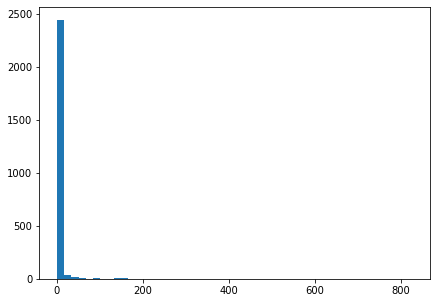

In [65]:
fig, ax = plt.subplots(figsize=(7,5))

ax.hist(vals, bins=50)

fig.show()

In [67]:
df['post_text']

0        DC police pulls down Trump busses and inspects...
1        Explosive new allegations that Obama conspired...
2        PATRIOT🇺🇸PARTY EST. 2020——————————————⚔️ #Patr...
3                     Statement from President DonaldTrump
4        The People Will Remember: Jason Miller says th...
                               ...                        
9996                                                      
9997     WATCH: Rockstar Utah Patriots Also Confronted ...
9998     Forgive me, but I can't stop myself 😂 #awoman ...
9999                                    FOLLOW & ECHO 🇺🇸🦅👇
10000    WATCH!!!VOTES TAKEN AWAY FROM DAVID PERDUE IN ...
Name: post_text, Length: 10001, dtype: object

In [82]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [89]:
posts = df['post_text'].tolist()

In [91]:
%%time

keep_tokens = []
for post in posts:
  tokens = nltk.word_tokenize(post)
  keep = []
  for token in tokens:
    word = token.lower()
    if word.isalnum() and word not in nltk.corpus.stopwords.words('english'):
      keep.append(word)
  keep_tokens.append(keep)

CPU times: user 21 s, sys: 2.2 s, total: 23.2 s
Wall time: 23.3 s


In [92]:
len(keep_tokens)

10001

In [94]:
df['post_tokens'] = keep_tokens

In [95]:
import itertools

In [97]:
list(itertools.chain(*[['a', 'b'],['b', 'c', 'd']]))

['a', 'b', 'b', 'c', 'd']

In [103]:
all_tokens = list(itertools.chain(*keep_tokens))

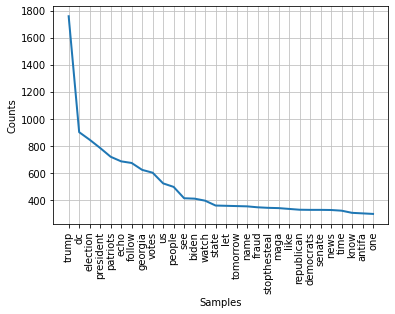

In [106]:
fd = nltk.FreqDist(all_tokens)
fd.plot(30, cumulative=False)